### **Data balancing**

In [ ]:
! pip install -U imbalanced-learn

     |████████████████████████████████| 206 kB 5.3 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [ ]:
import pandas as pd

df = pd.read_csv('/content/354swissadmet.csv', index_col=False)

In [ ]:
df

,ID,pIC50,activity,Original SMILES,Canonical SMILES,Formula,MW,#Heavy atoms,#Aromatic heavy atoms,Fraction Csp3,#Rotatable bonds,#H-bond acceptors,#H-bond donors,MR,TPSA,iLOGP,XLOGP3,WLOGP,MLOGP,Silicos-IT Log P,Consensus Log P,ESOL Log S,ESOL Solubility (mg/ml),ESOL Solubility (mol/l),ESOL Class,Ali Log S,Ali Solubility (mg/ml),Ali Solubility (mol/l),Ali Class,Silicos-IT LogSw,Silicos-IT Solubility (mg/ml),Silicos-IT Solubility (mol/l),Silicos-IT class,GI absorption,BBB permeant,Pgp substrate,CYP1A2 inhibitor,CYP2C19 inhibitor,CYP2C9 inhibitor,CYP2D6 inhibitor,CYP3A4 inhibitor,log Kp (cm/s),Lipinski #violations,Ghose #violations,Veber #violations,Egan #violations,Muegge #violations,Bioavailability Score,PAINS #alerts,Brenk #alerts,Leadlikeness #violations,Synthetic Accessibility
0,lit1,1.41,inactive,O=C(O)CO\N=C(\c(cs1)nc1N)C(=O)N[C@@H](C2(C)C)C...,OC(=O)CO/N=C(/c1csc(n1)N)\C(=O)N[C@@H]1C(=O)N(...,C12H15N5O9S2,437.41,28,5,0.42,9,11,4,96.04,247.43,0.39,-0.64,-0.92,-1.50,-2.05,-0.94,-1.69,9.000000,2.060000e-02,Very soluble,-4.08,3.610000e-02,8.260000e-05,Moderately soluble,-0.12,336.000000,7.670000e-01,Soluble,Low,No,Yes,No,No,No,No,No,-9.42,1,1,1,1,2,0.11,0,3,2,4.20
1,lit2,1.96,inactive,CC(C)C(CC)C=CC(C)C1CCC(C12C)C3C(CC2)C4(C)C(=CC...,CCC(C(C)C)C=CC(C1CCC2C1(C)CCC1C2CC=C2C1(C)CCC(...,C29H48O,412.69,30,0,0.86,5,1,1,132.75,20.23,5.01,8.56,7.80,6.62,6.86,6.97,-7.46,0.000014,3.460000e-08,Poorly soluble,-8.86,5.710000e-07,1.380000e-09,Poorly soluble,-5.47,0.001400,3.390000e-06,Moderately soluble,Low,No,No,No,No,Yes,No,No,-2.74,1,3,0,1,2,0.55,0,1,2,6.21
2,lit3,1.99,inactive,c1ccccc1C(C(=O)O)C(=O)N[C@H](C2=O)[C@H](N23)SC...,O=C(C(c1ccccc1)C(=O)O)N[C@@H]1C(=O)N2[C@@H]1SC...,C17H18N2O6S,378.40,26,6,0.41,6,6,3,96.44,149.31,1.18,1.13,0.11,0.94,0.20,0.71,-2.67,0.804000,2.120000e-03,Soluble,-3.86,5.230000e-02,1.380000e-04,Soluble,-1.92,4.530000,1.200000e-02,Soluble,Low,No,Yes,No,No,No,No,No,-7.81,0,0,1,1,0,0.56,0,1,1,4.26
3,lit4,2.32,inactive,C1C[C@H](O)C(C)(C)[C@@H]([C@]12C)CC[C@]3(C)[C@...,O[C@H]1CC[C@]2([C@H](C1(C)C)CC[C@@]1([C@@H]2CC...,C30H50O,426.72,31,0,0.93,0,1,1,134.88,20.23,4.73,9.30,8.17,6.92,6.92,7.21,-8.34,0.000002,4.520000e-09,Poorly soluble,-9.63,1.010000e-07,2.360000e-10,Poorly soluble,-7.16,0.000029,6.850000e-08,Poorly soluble,Low,No,No,No,No,No,No,No,-2.30,1,3,0,1,2,0.55,0,1,2,6.04
4,CHEMBL1379384,2.51,inactive,CCCc1ccc(C(=O)CCC(=O)O)cc1,CCCc1ccc(cc1)C(=O)CCC(=O)O,C13H16O3,220.26,16,6,0.38,6,3,1,62.60,54.37,1.94,2.91,2.69,2.16,3.05,2.55,-2.92,0.265000,1.200000e-03,Soluble,-3.71,4.270000e-02,1.940000e-04,Soluble,-3.73,0.040700,1.850000e-04,Soluble,High,Yes,No,No,No,No,No,No,-5.58,0,0,0,0,0,0.85,0,0,1,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,lit446,8.10,active,C1=CC(=CC=C1F)C2=C([N](C=C2)[S](N)(=O)=O)C(=O)...,[Na+][O-]C(=O)c1c(ccn1S(=O)(=O)N)c1ccc(cc1)F,C11H8FN2NaO4S,306.25,20,11,0.00,4,6,1,62.97,107.61,0.00,1.56,2.47,1.42,-1.17,0.86,-2.86,0.418000,1.370000e-03,Soluble,-3.43,1.140000e-01,3.720000e-04,Soluble,-2.90,0.389000,1.270000e-03,Soluble,High,No,No,No,No,No,No,No,-7.06,0,0,0,0,0,0.55,0,0,0,2.80
350,lit448,8.20,active,C1=CC(=CC=C1F)C2=C([N](C=C2)[S](N)(=O)=O)C(=O)...,[Na]OC(=O)c1c(ccn1S(=O)(=O)N)c1ccc(cc1)F,C11H8FN2NaO4S,306.25,20,11,0.00,4,6,1,63.37,99.77,0.00,1.56,2.47,1.42,-1.17,0.86,-2.86,0.418000,1.370000e-03,Soluble,-3.27,1.660000e-01,5.430000e-04,Soluble,-2.90,0.389000,1.270000e-03,Soluble,High,No,No,No,No,No,No,No,-7.06,0,0,0,0,0,0.55,0,0,0,2.80
351,lit449,8.22,active,CCOC(=O)N1C(=O)C2=CC=CC=C2[Se]1,CCOC(=O)n1[se]c2c(c1=O)cccc2,C10H9NO3Se,270.14,15,9,0.20,3,3,0,57.70,48.30,0.00,1.77,0.22,1.67,0.53,0.84,-2.88,0.359000,1.330000e-03,Soluble,-2.40,1.070000e+00,3.960000e-03,Soluble,-2.69,0.545000,2.020000e-03,Soluble,High,No,No,No,No,No,No,No,-6.69,0,0,0,0,0,0.55,0,1,0,2.90
352,lit450,8.40,active,c1ccc(C(=O)O)c(c12)O[B](O)(O)[C@H](C2)NC(=

In [ ]:
x = df.drop(['activity'], axis=1)
y = df['activity']

In [ ]:
x

,ID,pIC50,Original SMILES,Canonical SMILES,Formula,MW,#Heavy atoms,#Aromatic heavy atoms,Fraction Csp3,#Rotatable bonds,#H-bond acceptors,#H-bond donors,MR,TPSA,iLOGP,XLOGP3,WLOGP,MLOGP,Silicos-IT Log P,Consensus Log P,ESOL Log S,ESOL Solubility (mg/ml),ESOL Solubility (mol/l),ESOL Class,Ali Log S,Ali Solubility (mg/ml),Ali Solubility (mol/l),Ali Class,Silicos-IT LogSw,Silicos-IT Solubility (mg/ml),Silicos-IT Solubility (mol/l),Silicos-IT class,GI absorption,BBB permeant,Pgp substrate,CYP1A2 inhibitor,CYP2C19 inhibitor,CYP2C9 inhibitor,CYP2D6 inhibitor,CYP3A4 inhibitor,log Kp (cm/s),Lipinski #violations,Ghose #violations,Veber #violations,Egan #violations,Muegge #violations,Bioavailability Score,PAINS #alerts,Brenk #alerts,Leadlikeness #violations,Synthetic Accessibility
0,lit1,1.41,O=C(O)CO\N=C(\c(cs1)nc1N)C(=O)N[C@@H](C2(C)C)C...,OC(=O)CO/N=C(/c1csc(n1)N)\C(=O)N[C@@H]1C(=O)N(...,C12H15N5O9S2,437.41,28,5,0.42,9,11,4,96.04,247.43,0.39,-0.64,-0.92,-1.50,-2.05,-0.94,-1.69,9.000000,2.060000e-02,Very soluble,-4.08,3.610000e-02,8.260000e-05,Moderately soluble,-0.12,336.000000,7.670000e-01,Soluble,Low,No,Yes,No,No,No,No,No,-9.42,1,1,1,1,2,0.11,0,3,2,4.20
1,lit2,1.96,CC(C)C(CC)C=CC(C)C1CCC(C12C)C3C(CC2)C4(C)C(=CC...,CCC(C(C)C)C=CC(C1CCC2C1(C)CCC1C2CC=C2C1(C)CCC(...,C29H48O,412.69,30,0,0.86,5,1,1,132.75,20.23,5.01,8.56,7.80,6.62,6.86,6.97,-7.46,0.000014,3.460000e-08,Poorly soluble,-8.86,5.710000e-07,1.380000e-09,Poorly soluble,-5.47,0.001400,3.390000e-06,Moderately soluble,Low,No,No,No,No,Yes,No,No,-2.74,1,3,0,1,2,0.55,0,1,2,6.21
2,lit3,1.99,c1ccccc1C(C(=O)O)C(=O)N[C@H](C2=O)[C@H](N23)SC...,O=C(C(c1ccccc1)C(=O)O)N[C@@H]1C(=O)N2[C@@H]1SC...,C17H18N2O6S,378.40,26,6,0.41,6,6,3,96.44,149.31,1.18,1.13,0.11,0.94,0.20,0.71,-2.67,0.804000,2.120000e-03,Soluble,-3.86,5.230000e-02,1.380000e-04,Soluble,-1.92,4.530000,1.200000e-02,Soluble,Low,No,Yes,No,No,No,No,No,-7.81,0,0,1,1,0,0.56,0,1,1,4.26
3,lit4,2.32,C1C[C@H](O)C(C)(C)[C@@H]([C@]12C)CC[C@]3(C)[C@...,O[C@H]1CC[C@]2([C@H](C1(C)C)CC[C@@]1([C@@H]2CC...,C30H50O,426.72,31,0,0.93,0,1,1,134.88,20.23,4.73,9.30,8.17,6.92,6.92,7.21,-8.34,0.000002,4.520000e-09,Poorly soluble,-9.63,1.010000e-07,2.360000e-10,Poorly soluble,-7.16,0.000029,6.850000e-08,Poorly soluble,Low,No,No,No,No,No,No,No,-2.30,1,3,0,1,2,0.55,0,1,2,6.04
4,CHEMBL1379384,2.51,CCCc1ccc(C(=O)CCC(=O)O)cc1,CCCc1ccc(cc1)C(=O)CCC(=O)O,C13H16O3,220.26,16,6,0.38,6,3,1,62.60,54.37,1.94,2.91,2.69,2.16,3.05,2.55,-2.92,0.265000,1.200000e-03,Soluble,-3.71,4.270000e-02,1.940000e-04,Soluble,-3.73,0.040700,1.850000e-04,Soluble,High,Yes,No,No,No,No,No,No,-5.58,0,0,0,0,0,0.85,0,0,1,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,lit446,8.10,C1=CC(=CC=C1F)C2=C([N](C=C2)[S](N)(=O)=O)C(=O)...,[Na+][O-]C(=O)c1c(ccn1S(=O)(=O)N)c1ccc(cc1)F,C11H8FN2NaO4S,306.25,20,11,0.00,4,6,1,62.97,107.61,0.00,1.56,2.47,1.42,-1.17,0.86,-2.86,0.418000,1.370000e-03,Soluble,-3.43,1.140000e-01,3.720000e-04,Soluble,-2.90,0.389000,1.270000e-03,Soluble,High,No,No,No,No,No,No,No,-7.06,0,0,0,0,0,0.55,0,0,0,2.80
350,lit448,8.20,C1=CC(=CC=C1F)C2=C([N](C=C2)[S](N)(=O)=O)C(=O)...,[Na]OC(=O)c1c(ccn1S(=O)(=O)N)c1ccc(cc1)F,C11H8FN2NaO4S,306.25,20,11,0.00,4,6,1,63.37,99.77,0.00,1.56,2.47,1.42,-1.17,0.86,-2.86,0.418000,1.370000e-03,Soluble,-3.27,1.660000e-01,5.430000e-04,Soluble,-2.90,0.389000,1.270000e-03,Soluble,High,No,No,No,No,No,No,No,-7.06,0,0,0,0,0,0.55,0,0,0,2.80
351,lit449,8.22,CCOC(=O)N1C(=O)C2=CC=CC=C2[Se]1,CCOC(=O)n1[se]c2c(c1=O)cccc2,C10H9NO3Se,270.14,15,9,0.20,3,3,0,57.70,48.30,0.00,1.77,0.22,1.67,0.53,0.84,-2.88,0.359000,1.330000e-03,Soluble,-2.40,1.070000e+00,3.960000e-03,Soluble,-2.69,0.545000,2.020000e-03,Soluble,High,No,No,No,No,No,No,No,-6.69,0,0,0,0,0,0.55,0,1,0,2.90
352,lit450,8.40,c1ccc(C(=O)O)c(c12)O[B](O)(O)[C@H](C2)NC(=O)c3...,NCCNCc1ccc(cc1)C(=O)N[C@H]1Cc2cccc(c2O[B]1(O)O...,C19H23BN3O6,400.21,29,12,0.2

In [ ]:
y

0      inactive
1      inactive
2      inactive
3      inactive
4      inactive
         ...   
349      active
350      active
351      active
352      active
353      active
Name: activity, Length: 354, dtype: object

In [ ]:
y.value_counts()

inactive    208
active      146
Name: activity, dtype: int64

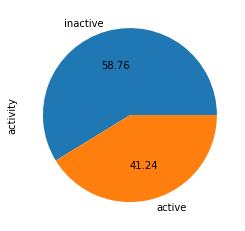

In [ ]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

**Undersampling**

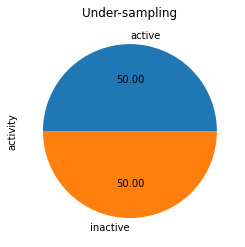

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
x_res, y_res = rus.fit_resample(x, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [ ]:
# Class distribution
y_res.value_counts()

active      146
inactive    146
Name: activity, dtype: int64

**Oversampling**

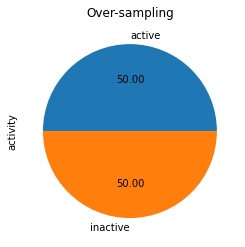

In [ ]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
x_res, y_res = ros.fit_resample(x, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [ ]:
y_res.value_counts()

active      208
inactive    208
Name: activity, dtype: int64

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-09-23 05:55:53--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   199MB/s    in 0.4s    

2021-09-23 05:55:54 (199 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b64

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

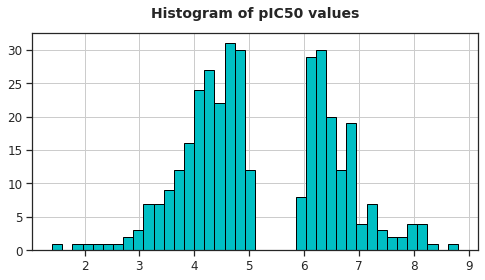

In [ ]:
df.pIC50.hist(bins=40, figsize=(8,4), color='#00BFC4', ec='black')
plt.title('Histogram of pIC50 values', fontsize=14, fontweight='black', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

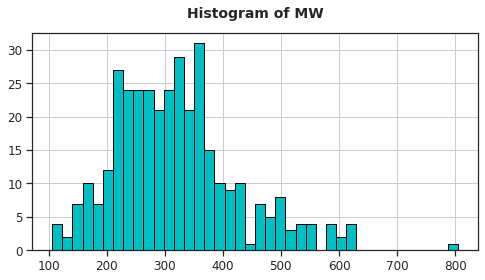

In [ ]:
df.MW.hist(bins=40, figsize=(8,4), color='#00BFC4', ec='black')
plt.title('Histogram of MW', fontsize=14, fontweight='black', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

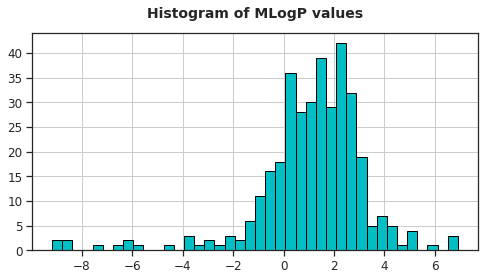

In [ ]:
df.MLOGP.hist(bins=40, figsize=(8,4), color='#00BFC4', ec='black')
plt.title('Histogram of MLogP values', fontsize=14, fontweight='black', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

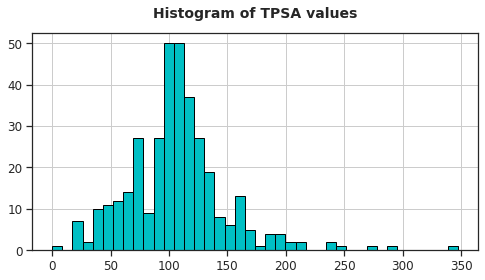

In [ ]:
df.TPSA.hist(bins=40, figsize=(8,4), color='#00BFC4', ec='black')
plt.title('Histogram of TPSA values', fontsize=14, fontweight='black', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
df.Consensus Log P.hist(bins=40, figsize=(8,4), color='#00BFC4', ec='black')
plt.title('Histogram of logP values', fontsize=14, fontweight='black', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

SyntaxError: ignored

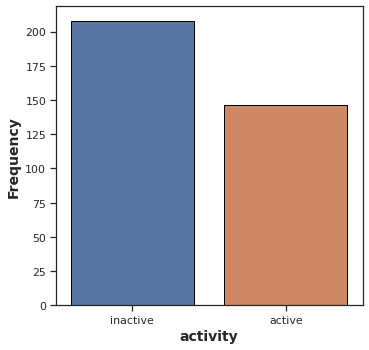

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='activity', data=df, edgecolor='black')

plt.xlabel('activity', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

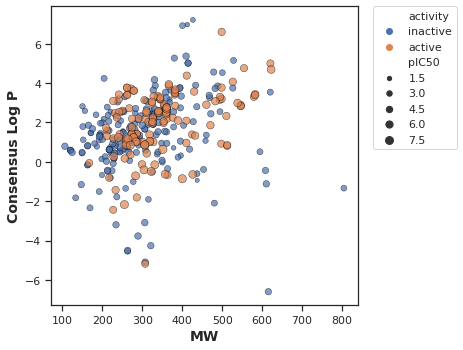

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='Consensus Log P', data=df, hue='activity', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('Consensus Log P', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

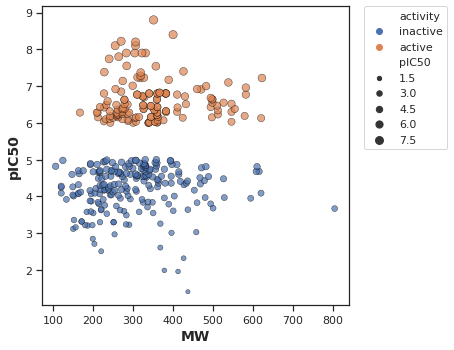

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='pIC50', data=df, hue='activity', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('pIC50', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_pIC50.pdf')

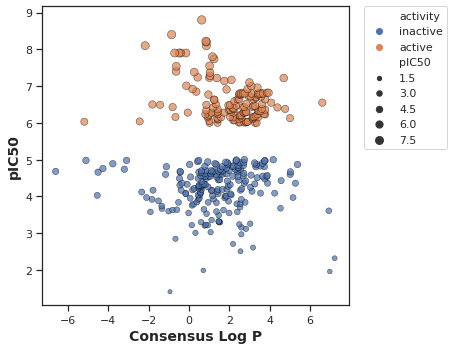

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='Consensus Log P', y='pIC50', data=df, hue='activity', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('Consensus Log P', fontsize=14, fontweight='bold')
plt.ylabel('pIC50', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_LogP_vs_pIC50.pdf')

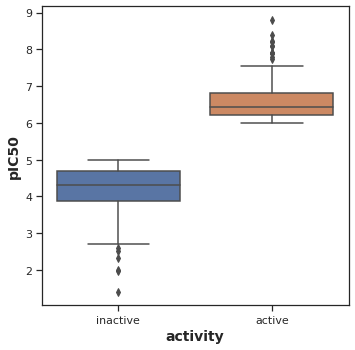

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'activity', y = 'pIC50', data = df)

plt.xlabel('activity', fontsize=14, fontweight='bold')
plt.ylabel('pIC50', fontsize=14, fontweight='bold')

plt.savefig('plot_pIC50')

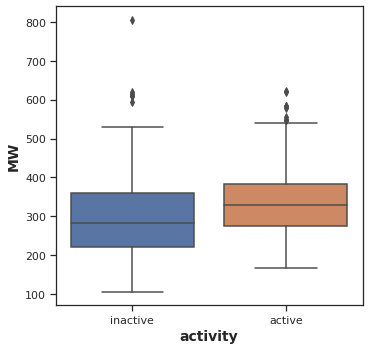

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'activity', y = 'MW', data = df)

plt.xlabel('activity', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

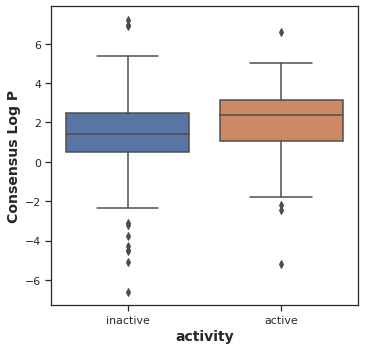

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'activity', y = 'Consensus Log P', data = df)

plt.xlabel('activity', fontsize=14, fontweight='bold')
plt.ylabel('Consensus Log P', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

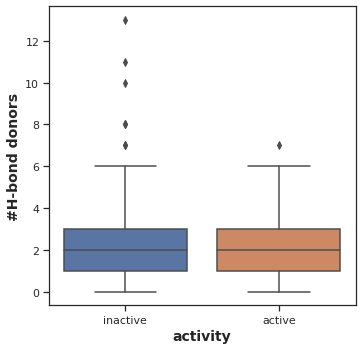

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'activity', y = '#H-bond donors', data = df)

plt.xlabel('activity', fontsize=14, fontweight='bold')
plt.ylabel('#H-bond donors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

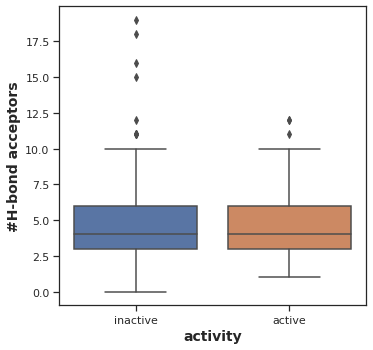

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'activity', y = '#H-bond acceptors', data = df)

plt.xlabel('activity', fontsize=14, fontweight='bold')
plt.ylabel('#H-bond acceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

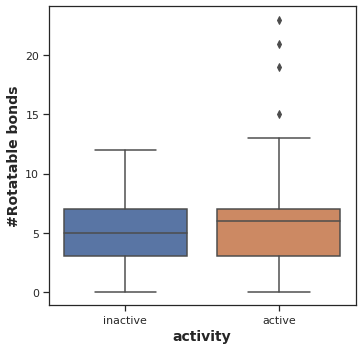

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'activity', y = '#Rotatable bonds', data = df)

plt.xlabel('activity', fontsize=14, fontweight='bold')
plt.ylabel('#Rotatable bonds', fontsize=14, fontweight='bold')

plt.savefig('plot_#Rotatable bonds.pdf')

### **PADELpy installation**

In [ ]:
! pip install padelpy

     |████████████████████████████████| 20.9 MB 1.3 MB/s 


In [ ]:
! wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
! unzip fingerprints_xml.zip

--2021-09-23 09:21:55--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2021-09-23 09:21:55--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zip’

fingerprints_xml.zi 100%[===================>]  10.62K  --.-KB/s    in 0s      

2021-09-23 09:21:56 (33.9 MB/s) - ‘fingerprints_xml.zip’ saved [10871/10871]

Archive:  fingerprints_xm

In [ ]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [ ]:
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [25]:
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'Substructure': 'SubstructureFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml'}

In [ ]:
import pandas as pd


In [ ]:
! wget https://raw.githubusercontent.com/GeorgeYuriCADD/IC50-dataset/main/354swissadmet.csv

--2021-09-23 09:22:10--  https://raw.githubusercontent.com/GeorgeYuriCADD/IC50-dataset/main/354swissadmet.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125598 (123K) [text/plain]
Saving to: ‘354swissadmet.csv.1’

354swissadmet.csv.1 100%[===================>] 122.65K  --.-KB/s    in 0.03s   

2021-09-23 09:22:10 (4.66 MB/s) - ‘354swissadmet.csv.1’ saved [125598/125598]



In [ ]:
df = pd.read_csv('354swissadmet.csv')
df


,ID,pIC50,activity,Original SMILES,Canonical SMILES,Formula,MW,#Heavy atoms,#Aromatic heavy atoms,Fraction Csp3,#Rotatable bonds,#H-bond acceptors,#H-bond donors,MR,TPSA,iLOGP,XLOGP3,WLOGP,MLOGP,Silicos-IT Log P,Consensus Log P,ESOL Log S,ESOL Solubility (mg/ml),ESOL Solubility (mol/l),ESOL Class,Ali Log S,Ali Solubility (mg/ml),Ali Solubility (mol/l),Ali Class,Silicos-IT LogSw,Silicos-IT Solubility (mg/ml),Silicos-IT Solubility (mol/l),Silicos-IT class,GI absorption,BBB permeant,Pgp substrate,CYP1A2 inhibitor,CYP2C19 inhibitor,CYP2C9 inhibitor,CYP2D6 inhibitor,CYP3A4 inhibitor,log Kp (cm/s),Lipinski #violations,Ghose #violations,Veber #violations,Egan #violations,Muegge #violations,Bioavailability Score,PAINS #alerts,Brenk #alerts,Leadlikeness #violations,Synthetic Accessibility
0,lit1,1.41,inactive,O=C(O)CO\N=C(\c(cs1)nc1N)C(=O)N[C@@H](C2(C)C)C...,OC(=O)CO/N=C(/c1csc(n1)N)\C(=O)N[C@@H]1C(=O)N(...,C12H15N5O9S2,437.41,28,5,0.42,9,11,4,96.04,247.43,0.39,-0.64,-0.92,-1.50,-2.05,-0.94,-1.69,9.000000,2.060000e-02,Very soluble,-4.08,3.610000e-02,8.260000e-05,Moderately soluble,-0.12,336.000000,7.670000e-01,Soluble,Low,No,Yes,No,No,No,No,No,-9.42,1,1,1,1,2,0.11,0,3,2,4.20
1,lit2,1.96,inactive,CC(C)C(CC)C=CC(C)C1CCC(C12C)C3C(CC2)C4(C)C(=CC...,CCC(C(C)C)C=CC(C1CCC2C1(C)CCC1C2CC=C2C1(C)CCC(...,C29H48O,412.69,30,0,0.86,5,1,1,132.75,20.23,5.01,8.56,7.80,6.62,6.86,6.97,-7.46,0.000014,3.460000e-08,Poorly soluble,-8.86,5.710000e-07,1.380000e-09,Poorly soluble,-5.47,0.001400,3.390000e-06,Moderately soluble,Low,No,No,No,No,Yes,No,No,-2.74,1,3,0,1,2,0.55,0,1,2,6.21
2,lit3,1.99,inactive,c1ccccc1C(C(=O)O)C(=O)N[C@H](C2=O)[C@H](N23)SC...,O=C(C(c1ccccc1)C(=O)O)N[C@@H]1C(=O)N2[C@@H]1SC...,C17H18N2O6S,378.40,26,6,0.41,6,6,3,96.44,149.31,1.18,1.13,0.11,0.94,0.20,0.71,-2.67,0.804000,2.120000e-03,Soluble,-3.86,5.230000e-02,1.380000e-04,Soluble,-1.92,4.530000,1.200000e-02,Soluble,Low,No,Yes,No,No,No,No,No,-7.81,0,0,1,1,0,0.56,0,1,1,4.26
3,lit4,2.32,inactive,C1C[C@H](O)C(C)(C)[C@@H]([C@]12C)CC[C@]3(C)[C@...,O[C@H]1CC[C@]2([C@H](C1(C)C)CC[C@@]1([C@@H]2CC...,C30H50O,426.72,31,0,0.93,0,1,1,134.88,20.23,4.73,9.30,8.17,6.92,6.92,7.21,-8.34,0.000002,4.520000e-09,Poorly soluble,-9.63,1.010000e-07,2.360000e-10,Poorly soluble,-7.16,0.000029,6.850000e-08,Poorly soluble,Low,No,No,No,No,No,No,No,-2.30,1,3,0,1,2,0.55,0,1,2,6.04
4,CHEMBL1379384,2.51,inactive,CCCc1ccc(C(=O)CCC(=O)O)cc1,CCCc1ccc(cc1)C(=O)CCC(=O)O,C13H16O3,220.26,16,6,0.38,6,3,1,62.60,54.37,1.94,2.91,2.69,2.16,3.05,2.55,-2.92,0.265000,1.200000e-03,Soluble,-3.71,4.270000e-02,1.940000e-04,Soluble,-3.73,0.040700,1.850000e-04,Soluble,High,Yes,No,No,No,No,No,No,-5.58,0,0,0,0,0,0.85,0,0,1,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,lit446,8.10,active,C1=CC(=CC=C1F)C2=C([N](C=C2)[S](N)(=O)=O)C(=O)...,[Na+][O-]C(=O)c1c(ccn1S(=O)(=O)N)c1ccc(cc1)F,C11H8FN2NaO4S,306.25,20,11,0.00,4,6,1,62.97,107.61,0.00,1.56,2.47,1.42,-1.17,0.86,-2.86,0.418000,1.370000e-03,Soluble,-3.43,1.140000e-01,3.720000e-04,Soluble,-2.90,0.389000,1.270000e-03,Soluble,High,No,No,No,No,No,No,No,-7.06,0,0,0,0,0,0.55,0,0,0,2.80
350,lit448,8.20,active,C1=CC(=CC=C1F)C2=C([N](C=C2)[S](N)(=O)=O)C(=O)...,[Na]OC(=O)c1c(ccn1S(=O)(=O)N)c1ccc(cc1)F,C11H8FN2NaO4S,306.25,20,11,0.00,4,6,1,63.37,99.77,0.00,1.56,2.47,1.42,-1.17,0.86,-2.86,0.418000,1.370000e-03,Soluble,-3.27,1.660000e-01,5.430000e-04,Soluble,-2.90,0.389000,1.270000e-03,Soluble,High,No,No,No,No,No,No,No,-7.06,0,0,0,0,0,0.55,0,0,0,2.80
351,lit449,8.22,active,CCOC(=O)N1C(=O)C2=CC=CC=C2[Se]1,CCOC(=O)n1[se]c2c(c1=O)cccc2,C10H9NO3Se,270.14,15,9,0.20,3,3,0,57.70,48.30,0.00,1.77,0.22,1.67,0.53,0.84,-2.88,0.359000,1.330000e-03,Soluble,-2.40,1.070000e+00,3.960000e-03,Soluble,-2.69,0.545000,2.020000e-03,Soluble,High,No,No,No,No,No,No,No,-6.69,0,0,0,0,0,0.55,0,1,0,2.90
352,lit450,8.40,active,c1ccc(C(=O)O)c(c12)O[B](O)(O)[C@H](C2)NC(=

In [ ]:
df2 = pd.concat( [df['Canonical SMILES'],df['ID']], axis=1 )
df2.to_csv('molecule.smi', sep='\t', index=False, header=False)
df2

,Canonical SMILES,ID
0,OC(=O)CO/N=C(/c1csc(n1)N)\C(=O)N[C@@H]1C(=O)N(...,lit1
1,CCC(C(C)C)C=CC(C1CCC2C1(C)CCC1C2CC=C2C1(C)CCC(...,lit2
2,O=C(C(c1ccccc1)C(=O)O)N[C@@H]1C(=O)N2[C@@H]1SC...,lit3
3,O[C@H]1CC[C@]2([C@H](C1(C)C)CC[C@@]1([C@@H]2CC...,lit4
4,CCCc1ccc(cc1)C(=O)CCC(=O)O,CHEMBL1379384
...,...,...
349,[Na+][O-]C(=O)c1c(ccn1S(=O)(=O)N)c1ccc(cc1)F,lit446
350,[Na]OC(=O)c1c(ccn1S(=O)(=O)N)c1ccc(cc1)F,lit448
351,CCOC(=O)n1[se]c2c(c1=O)cccc2,lit449
352,NCCNCc1ccc(cc1)C(=O)N[C@H]1Cc2cccc(c2O[B]1(O)O...,lit450


In [ ]:
fp

{'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'Substructure': 'SubstructureFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml'}

In [ ]:
from padelpy import padeldescriptor

fingerprint = 'Substructure'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #Substructure.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi', 
                d_file=fingerprint_output_file, #'Substructure.csv'
                #descriptortypes='SubstructureFingerprint.xml', 
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

,Name,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,SubFP11,SubFP12,SubFP13,SubFP14,SubFP15,SubFP16,SubFP17,SubFP18,SubFP19,SubFP20,SubFP21,SubFP22,SubFP23,SubFP24,SubFP25,SubFP26,SubFP27,SubFP28,SubFP29,SubFP30,SubFP31,SubFP32,SubFP33,SubFP34,SubFP35,SubFP36,SubFP37,SubFP38,SubFP39,...,SubFP268,SubFP269,SubFP270,SubFP271,SubFP272,SubFP273,SubFP274,SubFP275,SubFP276,SubFP277,SubFP278,SubFP279,SubFP280,SubFP281,SubFP282,SubFP283,SubFP284,SubFP285,SubFP286,SubFP287,SubFP288,SubFP289,SubFP290,SubFP291,SubFP292,SubFP293,SubFP294,SubFP295,SubFP296,SubFP297,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,lit1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
1,lit3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
2,lit2,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
3,CHEMBL1379384,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
4,lit5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,lit446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,1
350,lit448,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,1
351,lit449,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
352,lit451,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1


In [ ]:
x= descriptors.drop('Name', axis=1)
y = df['activity']

In [ ]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
x_res, y_res = ros.fit_resample(x, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


AttributeError: ignored

In [ ]:
y

0      inactive
1      inactive
2      inactive
3      inactive
4      inactive
         ...   
349      active
350      active
351      active
352      active
353      active
Name: activity, Length: 354, dtype: object

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

x = remove_low_variance(x, threshold=0.1)
x

,SubFP1,SubFP2,SubFP3,SubFP20,SubFP23,SubFP36,SubFP38,SubFP84,SubFP88,SubFP96,SubFP100,SubFP137,SubFP143,SubFP169,SubFP179,SubFP181,SubFP184,SubFP224,SubFP274,SubFP275,SubFP287
0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,1,1,1
1,1,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0
2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1
4,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
351,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1
352,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1,1,1


In [ ]:
x

,SubFP1,SubFP2,SubFP3,SubFP20,SubFP23,SubFP36,SubFP38,SubFP84,SubFP88,SubFP96,SubFP100,SubFP137,SubFP143,SubFP169,SubFP179,SubFP181,SubFP184,SubFP224,SubFP274,SubFP275,SubFP287
0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,1,1,1
1,1,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0
2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1
4,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
351,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1
352,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1,1,1


In [ ]:
y

0      inactive
1      inactive
2      inactive
3      inactive
4      inactive
         ...   
349      active
350      active
351      active
352      active
353      active
Name: activity, Length: 354, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape

((283, 21), (71, 21))

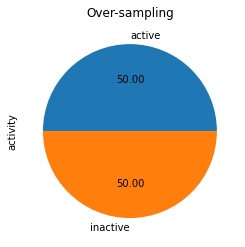

In [ ]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
x_res, y_res = ros.fit_resample(x_train, y_train)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [ ]:
x_train.shape, x_test.shape

((283, 21), (71, 21))

In [ ]:
y_train.shape, y_test.shape

((283,), (71,))

In [ ]:
from sklearn import svm, datasets

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef

model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [ ]:
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_train

0.934405859359709

In [ ]:
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_test

0.6475981407127542

In [ ]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=500, random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=10)
cv_scores

array([0.79310345, 0.82758621, 0.79310345, 0.82142857, 0.92857143,
       0.78571429, 0.92857143, 0.85714286, 0.78571429, 0.92857143])

In [ ]:
mcc_cv = cv_scores.mean()
mcc_cv

0.844950738916256

In [ ]:
model_name = pd.Series(['Random forest'], name='Name')
mcc_train_series = pd.Series(mcc_train, name='MCC_train')
mcc_cv_series = pd.Series(mcc_cv, name='MCC_cv')
mcc_test_series = pd.Series(mcc_test, name='MCC_test')

performance_metrics = pd.concat([model_name, mcc_train_series, mcc_cv_series, mcc_test_series], axis=1)
performance_metrics

,Name,MCC_train,MCC_cv,MCC_test
0,Random forest,0.934406,0.844951,0.647598
